In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# Index
* Reading Csv File
* Removing unnecessary columns
* Classify The Emails
* Simplify The Data
* Train Test Split
* Converting Data into Integer
* Applying Logistic Regression
* Got 90% Accuracy

# Reading Csv File

In [2]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding="latin-1")

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Removing unnecessary columns

In [5]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

# Classify The Emails

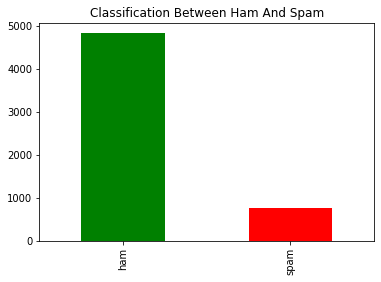

In [8]:
import matplotlib.pyplot as plt
df2=pd.value_counts(df["v1"])
df2.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Simplify The Data

In [10]:
for i in range(0,5572):
    if df['v1'][i]=='spam':
        df['v1'][i]=1
    else:
        df['v1'][i]=0

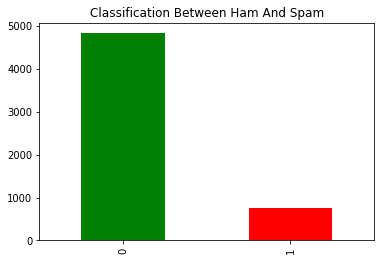

In [11]:
import matplotlib.pyplot as plt
df2=pd.value_counts(df["v1"])
df2.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.v2, df.v1,test_size=0.3, random_state=42 )

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train_new= cv.fit_transform(x_train)

In [14]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
2505    0
2525    0
4975    0
650     0
4463    0
Name: v1, Length: 1672, dtype: object

In [15]:
x_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 3900, dtype: object

In [16]:
x_test

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
2505                 Congrats kano..whr s the treat maga?
2525    Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...
4975    You are gorgeous! keep those pix cumming :) th...
650     Thats cool! Sometimes slow and gentle. Sonetim...
4463         Ranjith cal drpd Deeraj and deepak 5min hold
Name: v2, Length: 1672, dtype: object

In [17]:
y_train

708     1
4338    0
5029    0
4921    0
2592    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: v1, Length: 3900, dtype: object

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Converting Data into Integer

In [19]:
y_train=y_train.astype(int)

In [20]:
x_train_new=x_train_new.astype(int)

In [21]:
x_train_new

<3900x7206 sparse matrix of type '<class 'numpy.int64'>'
	with 51569 stored elements in Compressed Sparse Row format>

In [22]:
y_test=y_test.astype(int)

# Applying Logistic Regression

In [23]:
lr= LogisticRegression()
lr.fit(x_train_new, y_train)
lr_pred= lr.predict(tf.transform(x_test))
lr_cm= confusion_matrix(y_test, lr_pred)

NameError: name 'LogisticRegression' is not defined

# Got 90% Accuracy

> Thanks